# **1. Import**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
# import sklearn libararies
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# **2. Read Data**

In [2]:
data = pd.read_csv(r'C:\Users\asus\Desktop\ML challenge\petroCoder\tech_challenge2021_train.csv')

# **3. Glimps Data**

In [3]:
data.sample(10)

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
51891,USROP_A 2 N-SH_F-14d,2811.317,8.514631,16866.99982,9.190000,2.120000,99.809998,1985.199953,1.310000,215.9,139.140274,2749.438037,21.507
36377,USROP_A 2 N-SH_F-14d,1892.619,5.475876,17575.00000,11.220001,48.700001,160.229996,4184.979979,1.300000,444.5,136.539995,1892.128906,104.786
140749,USROP_A 4 N-SH_F-15Sd,2809.979,8.600111,24410.12977,13.517505,27.852624,248.730000,2193.343421,1.370000,215.9,121.957380,2545.633517,28.680
178105,USROP_A 5 N-SH-F-5d,3074.822,8.025167,24819.00024,25.239999,35.380001,292.640015,2110.969971,1.370000,215.9,132.196009,2733.576854,6.640
40615,USROP_A 2 N-SH_F-14d,2135.142,8.433054,19857.00073,11.870000,14.150000,119.529999,4426.950195,1.310000,444.5,141.077744,2134.637234,60.543
177524,USROP_A 5 N-SH-F-5d,3023.101,6.536381,24192.99927,24.690001,32.040001,291.929993,2111.540039,1.350000,215.9,133.705185,2692.304496,11.150
53208,USROP_A 2 N-SH_F-14d,2854.001,14.153661,16697.99958,14.660000,19.560000,140.600006,1985.119994,1.330000,215.9,135.754824,2780.023498,14.146
144649,USROP_A 4 N-SH_F-15Sd,2995.004,4.857974,16497.36157,11.917640,5.361432,217.580000,1794.550267,1.320000,215.9,132.553298,2628.170004,176.020
41143,USROP_A 2 N-SH_F-14d,2166.442,4.598920,19719.00025,22.100001,45.220001,158.899994,4426.939940,1.310000,444.5,144.922063,2165.897218,43.219
114683,USROP_A 3 N-SH-F-15d,3759.001,11.852369,14389.88247,27.623435,29.693921,139.736000,1877.791477,11.266297,215.9,133.926322,2975.480765,53.356


In [4]:
data.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000
max,4090.001000,31.411272,24998.459410,36.489128,99.206304,311.230011,4538.450195,12.017384,444.500000,152.926842,3248.389893,260.899000


# **4. Exploratory Data Analysis**

In [5]:
# remove all rows that contains missing value
data.replace(['-999', -999], np.nan, inplace=True)
data.dropna(axis=0, inplace=True)
data.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000
max,4090.001000,31.411272,24998.459410,36.489128,99.206304,311.230011,4538.450195,12.017384,444.500000,152.926842,3248.389893,260.899000


In [6]:
data.isna().any()

Well Identifier                   False
Measured Depth m                  False
Weight on Bit kkgf                False
Average Standpipe Pressure kPa    False
Average Surface Torque kN.m       False
Rate of Penetration m/h           False
Average Rotary Speed rpm          False
Mud Flow In L/min                 False
Mud Density In g/cm3              False
Diameter mm                       False
Average Hookload kkgf             False
Hole Depth (TVD) m                False
USROP Gamma gAPI                  False
dtype: bool

In [7]:
wells = data['Well Identifier'].unique()
wells

array(['USROP_A 0 N-NA_F-9_Ad', 'USROP_A 1 N-S_F-7d',
       'USROP_A 2 N-SH_F-14d', 'USROP_A 3 N-SH-F-15d',
       'USROP_A 4 N-SH_F-15Sd', 'USROP_A 5 N-SH-F-5d',
       'USROP_A 6 N-SH_F-9d'], dtype=object)

In [8]:
len(wells)

7

In [9]:
data.columns.tolist()

['Well Identifier',
 'Measured Depth m',
 'Weight on Bit kkgf',
 'Average Standpipe Pressure kPa',
 'Average Surface Torque kN.m',
 'Rate of Penetration m/h',
 'Average Rotary Speed rpm',
 'Mud Flow In L/min',
 'Mud Density In g/cm3',
 'Diameter mm',
 'Average Hookload kkgf',
 'Hole Depth (TVD) m',
 'USROP Gamma gAPI']

### Look at some log curves for a couple of wells

(1205.999, 491.033)

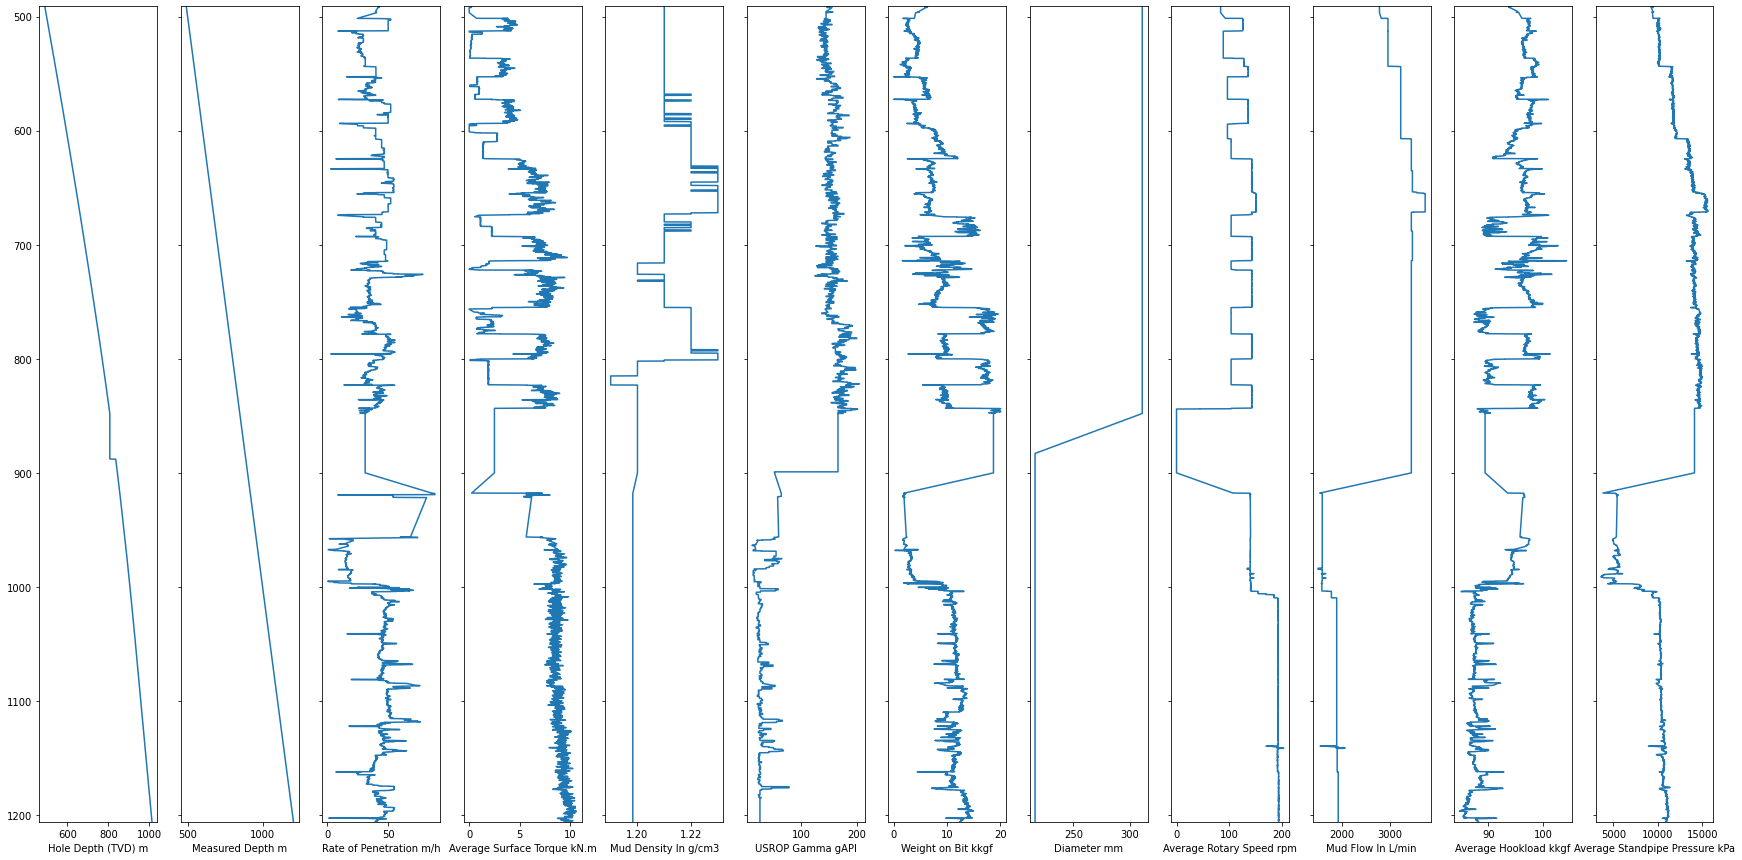

In [10]:
well_data = data[data['Well Identifier'] == wells[0]]
fig, axs = plt.subplots(1, len(well_data.columns)-1, figsize=(30, 15), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['Well Identifier'])):
 axs[ic].plot(well_data[col], well_data['Measured Depth m'])
 axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['Measured Depth m'].values[-1], well_data['Measured Depth m'].values[0])

(633.536, 301.231)

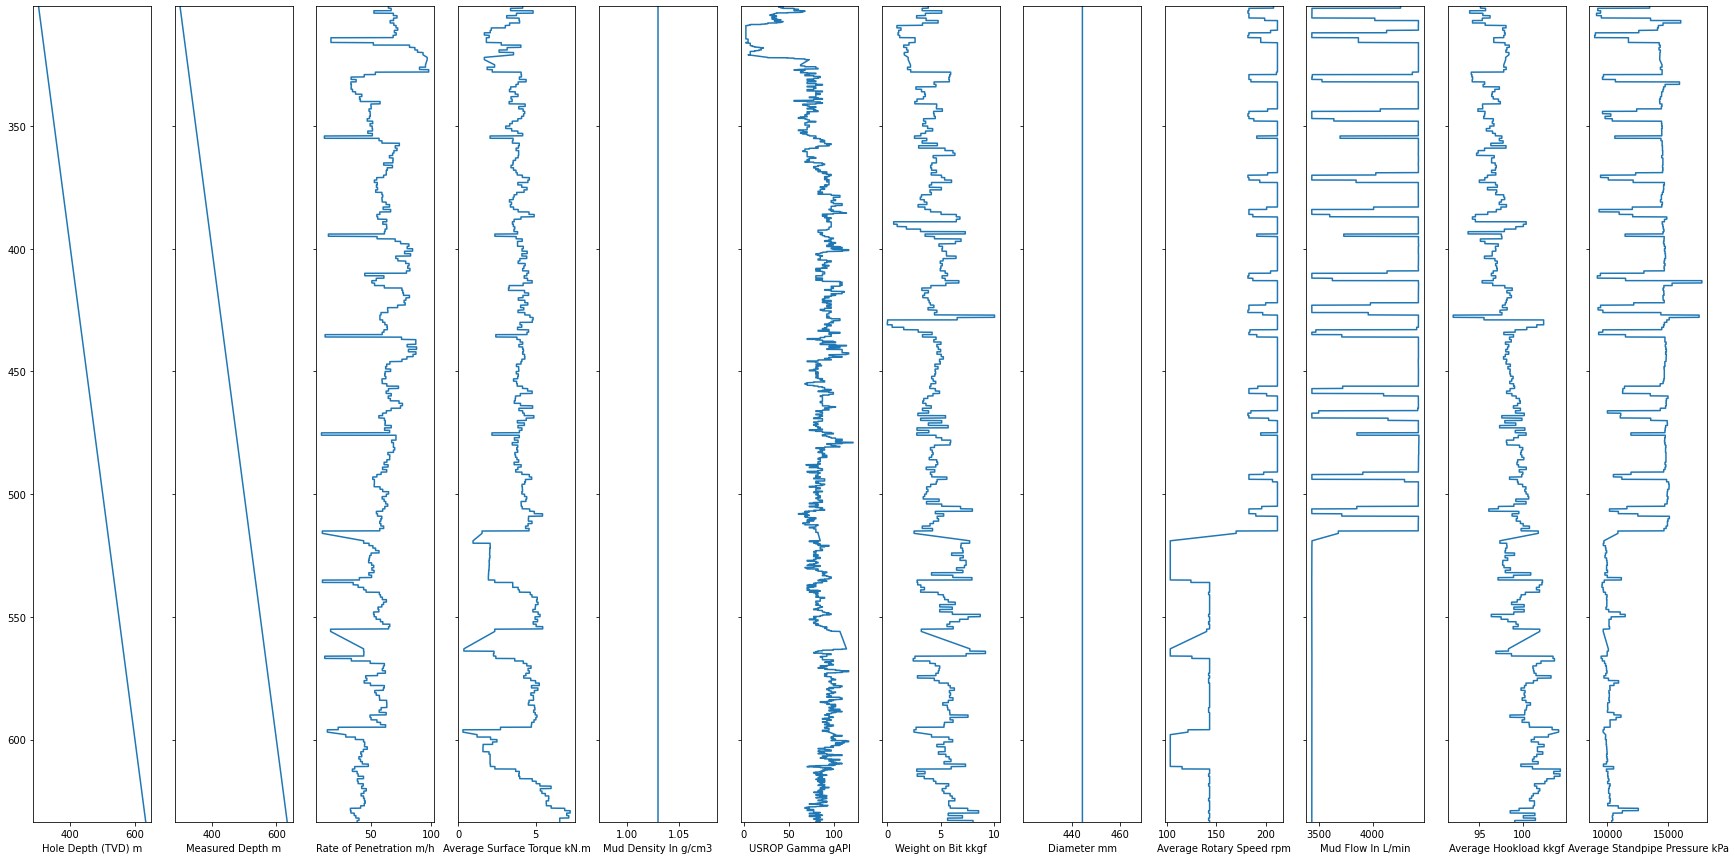

In [11]:
well_data = data[data['Well Identifier'] == wells[1]]
fig, axs = plt.subplots(1, len(well_data.columns)-1, figsize=(30, 15), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['Well Identifier'])):
 axs[ic].plot(well_data[col], well_data['Measured Depth m'])
 axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['Measured Depth m'].values[-1], well_data['Measured Depth m'].values[0])

In [12]:
well_data.columns

Index(['Well Identifier', 'Measured Depth m', 'Weight on Bit kkgf',
       'Average Standpipe Pressure kPa', 'Average Surface Torque kN.m',
       'Rate of Penetration m/h', 'Average Rotary Speed rpm',
       'Mud Flow In L/min', 'Mud Density In g/cm3', 'Diameter mm',
       'Average Hookload kkgf', 'Hole Depth (TVD) m', 'USROP Gamma gAPI'],
      dtype='object')

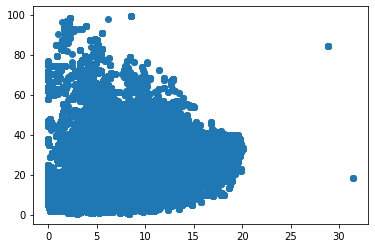

In [13]:
# check if there's any co-linearity between features
# you may check this for all of the features and see if there's any good finding. 
plt.scatter(data['Weight on Bit kkgf'], data['Rate of Penetration m/h'])

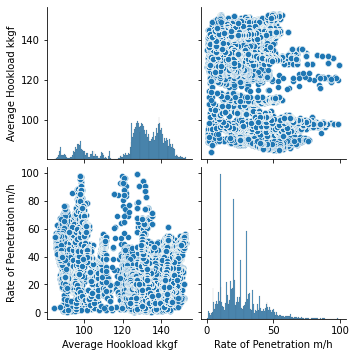

In [14]:
# another library from Seaborn to check the co-linearity
sb.pairplot(data[['Average Hookload kkgf', 'Rate of Penetration m/h']])

# **5. Build Machine Learning Models**

#### Preparing data for training

In [15]:
X = data.drop(columns=['Well Identifier', 'Rate of Penetration m/h'])

In [16]:
y = data['Rate of Penetration m/h']

#### Shuffle the data


In [17]:
X, y = shuffle(X, y, random_state=42)

In [18]:
X

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
95319,2886.816,11.920407,13747.38762,22.303205,139.736,2121.382739,10.849026,215.90,124.987378,2645.491178,7.350
99368,3024.293,6.128940,14811.55204,23.271259,139.736,2121.378954,11.182843,215.90,125.260440,2733.591790,14.002
131291,2012.594,5.333116,22280.20135,11.600000,124.140,3987.855834,1.450000,311.15,135.214376,1906.749552,103.520
162157,3748.516,3.304420,15244.43248,17.475138,179.505,1705.918630,1.310000,215.90,140.589594,2945.014786,57.565
97546,2966.128,3.889101,14624.13875,21.763590,139.736,2121.378954,11.182843,215.90,126.296899,2697.390998,9.994
...,...,...,...,...,...,...,...,...,...,...,...
119879,4014.792,16.772031,16404.12376,32.389135,139.736,2077.184268,11.266297,215.90,134.440243,3150.273506,67.673
103694,3170.837,1.850657,16055.68341,16.283374,139.736,2121.382739,11.182843,215.90,132.571442,2810.914978,27.000
131932,2058.619,5.863368,22478.97720,11.270001,140.000,3987.855834,1.460000,311.15,135.642655,1946.937432,85.330
146867,3062.280,8.187342,19464.93405,11.876965,234.380,2016.072577,1.320000,215.90,130.639139,2654.130125,9.370


### Scale the features

In [19]:
scaler = StandardScaler()

In [20]:
X.columns

Index(['Measured Depth m', 'Weight on Bit kkgf',
       'Average Standpipe Pressure kPa', 'Average Surface Torque kN.m',
       'Average Rotary Speed rpm', 'Mud Flow In L/min', 'Mud Density In g/cm3',
       'Diameter mm', 'Average Hookload kkgf', 'Hole Depth (TVD) m',
       'USROP Gamma gAPI'],
      dtype='object')

In [21]:
X = scaler.fit_transform(X)

#### Split into train and test data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
y_train

88863     19.674840
23151     24.280001
120035    37.695226
135151    19.842480
111584    29.839006
            ...    
180245    20.080000
63527     29.150000
178845     2.020000
26418     56.070000
1247      31.997904
Name: Rate of Penetration m/h, Length: 159142, dtype: float64

####Example prediction on open test dataset

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 120, None], 
    'n_estimators':[70],
    'min_samples_split': [2, 3, 4],
    'max_features' : ['log2']
}

rf = RandomForestRegressor(random_state=42)

rf_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, n_iter = 10)

In [25]:
model = rf_search.fit(X_train, y_train)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


####Test model

In [26]:
model.best_params_

{'n_estimators': 70,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 90,
 'bootstrap': True}

In [27]:
Final_rf = RandomForestRegressor(n_estimators= 70,
 min_samples_split= 2,
 max_features= 'log2',
 max_depth= 90,
 bootstrap= True,
 random_state=42)

In [28]:
model_rf = Final_rf.fit(X_train, y_train)

In [29]:
y_pred_train = model_rf.predict(X_train)

In [30]:
mean_absolute_error(y_train, y_pred_train)

0.04179016879106327

In [31]:
y_pred_test = model_rf.predict(X_test)

In [32]:
mean_absolute_error(y_test, y_pred_test)

0.11155609221403522

In [33]:
test = pd.read_csv(r'C:\Users\asus\Desktop\ML challenge\petroCoder\tech_challenge2021_test.csv')

In [34]:
test = test.drop(columns=['Well Identifier'])

In [35]:
test = scaler.fit_transform(test)

In [36]:
y_test_f = model_rf.predict(test)

In [37]:
np.savetxt('test_predictions.csv', y_test_f, header='Rate of Penetration', comments='', fmt='%f')

In [38]:
y_test_f

array([26.94959742, 26.94959742, 26.94959742, ..., 14.2016774 ,
       14.2016774 , 14.2016774 ])

In [39]:
test.shape

(114299, 11)

In [50]:
y_tested = pd.DataFrame(y_test_f)

In [51]:
y_tested.describe()

,0
count,114299.000000
mean,24.350480
std,3.984100
min,11.974266
25%,21.538951
50%,24.804737
75%,27.079678
max,39.181149
